<!-- Startup Sucess EDA -->

# StartUp Sucess- EDA

In [19]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
from tabulate import tabulate
!pip install folium
import folium
%pip install yfinance
%pip install tweepy
%pip install wbdata pandas

import yfinance as yf
import datetime
# import tweepy
import wbdata



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Explore and adjust data

## functions

### add economic info

In [20]:

def add_nasdaq_annual_changes(df):
    years = np.arange(1984, 2024).tolist()
    nasdaq_data = yf.download('^IXIC', start='1984-01-01', end='2024-01-01', interval='1mo')
    nasdaq_data['Year'] = nasdaq_data.index.year
    nasdaq_annual = nasdaq_data.groupby('Year')['Close'].last().pct_change().reset_index()
    nasdaq_annual.columns = ['Year', 'NASDAQ_Annual_Change']
    nasdaq_annual = nasdaq_annual[nasdaq_annual['Year'].isin(years)]
    nasdaq_annual.set_index('Year', inplace=True)
    
    # Add columns for each year based on the maximum founded_at_year in the DataFrame
    max_year = df['founded_at_year'].max()
    for year in range(max_year, max_year - 11, -1):
        year_index = max_year - year
        df[f'nasdaq_annual_changes_at_year_{year_index}'] = df['founded_at_year'].apply(
            lambda x: nasdaq_annual.loc[year, 'NASDAQ_Annual_Change'] if year in nasdaq_annual.index else np.nan
        )
    
    return df


# Affect workforce and investments
def add_info_on_inflation_over_years(df):
  us_inflation_data = {
      1984: 4.3, 1985: 3.6, 1986: 1.9, 1987: 3.6, 1988: 4.1, 1989: 4.8,
      1990: 5.4, 1991: 4.2, 1992: 3.0, 1993: 2.7, 1994: 2.6, 1995: 2.8,
      1996: 3.0, 1997: 2.3, 1998: 1.6, 1999: 2.2, 2000: 3.4, 2001: 2.8,
      2002: 1.6, 2003: 2.3, 2004: 2.7, 2005: 3.4, 2006: 3.2, 2007: 2.8,
      2008: 3.8, 2009: -0.4, 2010: 1.6, 2011: 3.2, 2012: 2.1, 2013: 1.5,
      2014: 1.6, 2015: 0.1, 2016: 1.3, 2017: 2.1, 2018: 2.4, 2019: 1.8,
      2020: 1.2, 2021: 4.7, 2022: 8.0, 2023: 3.2, 2024: 2.5  # 2024 is an estimate
  }

  df['inflation_at_year_0'] = df['founded_at_year'].map(us_inflation_data)
  df['inflation_at_year_1'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-1, None))
  df['inflation_at_year_2'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-2, None))
  df['inflation_at_year_3'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-3, None))

  df['inflation_at_year_4'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-4, None))
  df['inflation_at_year_5'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-5, None))
  df['inflation_at_year_6'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-6, None))
  df['inflation_at_year_7'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-7, None))
  df['inflation_at_year_8'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-8, None))
  df['inflation_at_year_9'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-9, None))
  df['inflation_at_year_10'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-10, None))

  return df

# Affect workforce and ivestments
def add_us_gdp_growth_data_over_years(df):
    us_gdp_growth_data = {
        1984: 7.3, 1985: 4.2, 1986: 3.5, 1987: 3.5, 1988: 4.2, 1989: 3.7,
        1990: 1.9, 1991: -0.1, 1992: 3.6, 1993: 2.8, 1994: 4.0, 1995: 2.7,
        1996: 3.8, 1997: 4.5, 1998: 4.5, 1999: 4.8, 2000: 4.1, 2001: 1.0,
        2002: 1.7, 2003: 2.9, 2004: 3.8, 2005: 3.5, 2006: 2.9, 2007: 1.9,
        2008: -0.1, 2009: -2.5, 2010: 2.6, 2011: 1.6, 2012: 2.2, 2013: 1.8,
        2014: 2.5, 2015: 3.1, 2016: 1.6, 2017: 2.4, 2018: 2.9, 2019: 2.3,
        2020: -3.4, 2021: 5.9, 2022: 2.1, 2023: 2.0, 2024: 2.3  # 2024 is an estimate
    }

    df['gdp_growth_at_year_0'] = df['founded_at_year'].map(us_gdp_growth_data)
    df['gdp_growth_at_year_1'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-1, None))
    df['gdp_growth_at_year_2'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-2, None))
    df['gdp_growth_at_year_3'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-3, None))

    df['gdp_growth_at_year_4'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-4, None))
    df['gdp_growth_at_year_5'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-5, None))
    df['gdp_growth_at_year_6'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-6, None))
    df['gdp_growth_at_year_7'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-7, None))
    df['gdp_growth_at_year_8'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-8, None))
    df['gdp_growth_at_year_9'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-9, None))
    df['gdp_growth_at_year_10'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-10, None))

    return df

# Affect workforce
def add_us_workforce_growth_data_over_years(df):
    us_workforce_growth_data = {
        1984: 1.5, 1985: 1.6, 1986: 1.5, 1987: 1.7, 1988: 1.6, 1989: 1.4,
        1990: 1.3, 1991: 1.1, 1992: 1.3, 1993: 1.2, 1994: 1.4, 1995: 1.2,
        1996: 1.3, 1997: 1.2, 1998: 1.3, 1999: 1.2, 2000: 1.2, 2001: 0.9,
        2002: 0.8, 2003: 0.7, 2004: 1.1, 2005: 1.2, 2006: 1.1, 2007: 1.1,
        2008: 0.7, 2009: -0.3, 2010: 0.7, 2011: 0.7, 2012: 1.0, 2013: 0.9,
        2014: 1.0, 2015: 1.2, 2016: 1.1, 2017: 1.0, 2018: 1.3, 2019: 1.0,
        2020: -2.3, 2021: 2.5, 2022: 1.8, 2023: 1.0, 2024: 1.1  # 2024 is an estimate
    }

    df['workforce_growth_at_year_0'] = df['founded_at_year'].map(us_workforce_growth_data)
    df['workforce_growth_at_year_1'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-1, None))
    df['workforce_growth_at_year_2'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-2, None))
    df['workforce_growth_at_year_3'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-3, None))

    df['workforce_growth_at_year_4'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-4, None))
    df['workforce_growth_at_year_5'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-5, None))
    df['workforce_growth_at_year_6'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-6, None))
    df['workforce_growth_at_year_7'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-7, None))
    df['workforce_growth_at_year_8'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-8, None))
    df['workforce_growth_at_year_9'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-9, None))
    df['workforce_growth_at_year_10'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-10, None))

    return df


def add_economic_indicators(df, indicator_code):
    # Define the fixed range of years
    years_range = 11
    start_year = df['founded_at_year'].min() - years_range
    end_year = df['founded_at_year'].max()

    # Fetch data from World Bank for a broad range of years
    countries = 'US'
    data = wbdata.get_dataframe({indicator_code: 'Economic_Indicator'}, country=countries)
    
    # Reset index and rename columns
    data = data.reset_index()
    data.rename(columns={indicator_code: 'Economic_Indicator'}, inplace=True)
    
    # Ensure 'date' column is in datetime format
    data['date'] = pd.to_datetime(data['date'], errors='coerce')
    
    # Extract year from the date and filter data
    data['Year'] = data['date'].dt.year
    data = data.set_index(['Year'])
    
    # Filter data to include only the years of interest
    years_of_interest = np.arange(start_year, end_year + 1)
    data = data.loc[data.index.isin(years_of_interest)]
    
    # Add columns for each year in the fixed range
    for i in range(years_range):
        if 'GDP' in indicator_code:
            key_word = 'GDP'
        elif 'UEM' in indicator_code:
            key_word = 'UEM'
        else:
            key_word = 'UNKNOWN'

        year = end_year - i
        df[f'{key_word}_at_year_{i}'] = df['founded_at_year'].apply(
            lambda x: data.loc[year, 'Economic_Indicator'] if year in data.index else np.nan
        )
    return df



### add & adjust data

In [21]:
# load data:
df = pd.read_csv('../data/startup_data.csv')
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [22]:
import yfinance as yf

# Create lable
df['status_code'] = df['status'].map({'acquired': 1, 'closed': 0})

# Convert the date column to datetime
df['founded_at_date'] = pd.to_datetime(df['founded_at'])

# Extract year, month, and day into separate columns
df['founded_at_year'] = df['founded_at_date'].dt.year
df['founded_at_month'] = df['founded_at_date'].dt.month
df['founded_at_day'] = df['founded_at_date'].dt.day

# remove irrelevant columns:
df = df.drop(columns=['status', 'founded_at', 'name', 'id', 'state_code.1', 'object_id', 'category_code', 'labels', 'closed_at',"Unnamed: 6","Unnamed: 0"])
# Add nasdaq data
df = add_nasdaq_annual_changes(df)

indicator_code = 'NY.GDP.MKTP.KD.ZG'
df = add_economic_indicators(df, indicator_code) # will replace add_us_gdp_growth_data_over_years

indicator_code = 'SL.UEM.TOTL.ZS'  # Unemployment rate, percentage of total labor force
df = add_economic_indicators(df, indicator_code) # will replace add_us_gdp_growth_data_over_years

[*********************100%%**********************]  1 of 1 completed


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 76 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   state_code                        923 non-null    object        
 1   latitude                          923 non-null    float64       
 2   longitude                         923 non-null    float64       
 3   zip_code                          923 non-null    object        
 4   city                              923 non-null    object        
 5   first_funding_at                  923 non-null    object        
 6   last_funding_at                   923 non-null    object        
 7   age_first_funding_year            923 non-null    float64       
 8   age_last_funding_year             923 non-null    float64       
 9   age_first_milestone_year          771 non-null    float64       
 10  age_last_milestone_year           771 non-null    

In [24]:
columns_with_nan = df.columns[df.isna().any()].tolist()
print(columns_with_nan)


['age_first_milestone_year', 'age_last_milestone_year']


There are 2 columns with missing values - 'age_first_milestone_year', 'age_last_milestone_year'. The companies that have no value in those columns also have 0 in milestones column. So, in order to deal with the missing values, we used a correlation matrix and we discovered that age_last_funding_year column has the highest correlation with 'age_first_milestone_year' & 'age_last_milestone_year'. (It make sense since one the company's milestones coulld be raising certain amount of money which could be done by funding).



age_first_milestone_year  skewness: 0.9444676662984656


age_last_milestone_year  skewness: 0.711933787802145
+-------+--------------------------+-------------------------+
|       | age_first_milestone_year | age_last_milestone_year |
+-------+--------------------------+-------------------------+
| count |          771.0           |          771.0          |
| mean  |    3.055353047989624     |    4.754422568093385    |
|  std  |    2.977057142897724     |    3.212107156209229    |
|  min  |         -14.1699         |         -7.0055         |
|  25%  |           1.0            |          2.411          |
|  50%  |          2.5205          |         4.4767          |
|  75%  |          4.6863          |         6.7534          |
|  max  |         24.6849          |         24.6849         |
+-------+--------------------------+-------------------------+


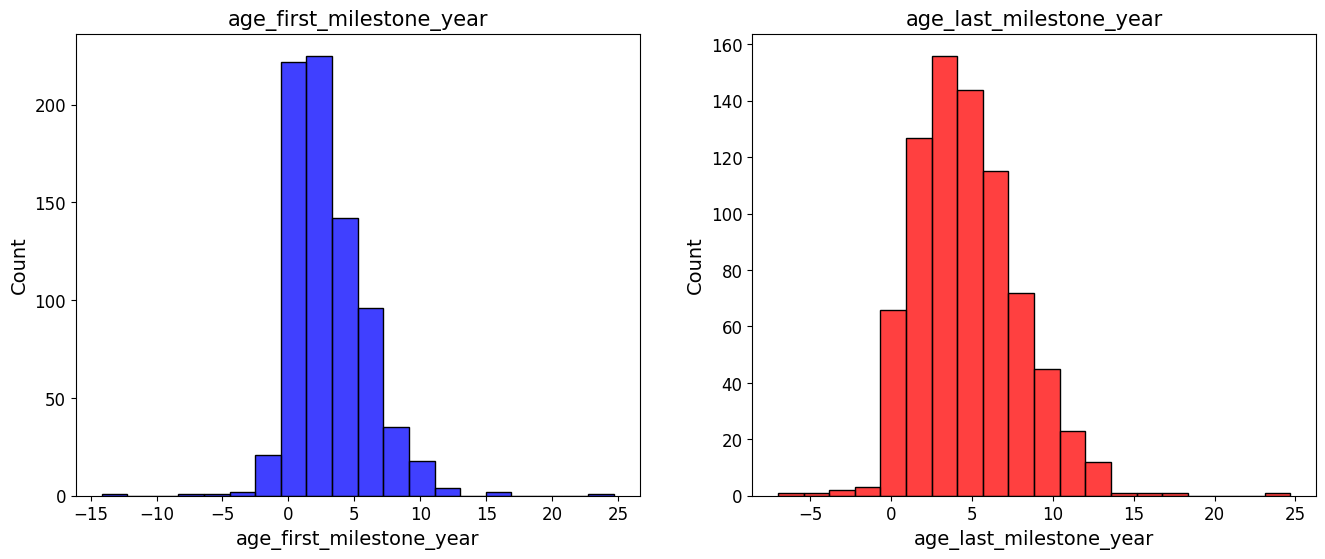

In [25]:
# looking at the columns with the missing values:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(df['age_first_milestone_year'], bins=20, color='blue',ax=axes[0])
axes[0].set_title('age_first_milestone_year', fontsize=15)
axes[0].set_xlabel('age_first_milestone_year', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
plt.grid()
print('age_first_milestone_year', ' skewness:', df['age_first_milestone_year'].skew(axis = 0, skipna = True) )
df['age_first_milestone_year'].describe(include='all')

sns.histplot(data=df['age_last_milestone_year'],bins=20, color='red',ax=axes[1])
axes[1].set_title('age_last_milestone_year', fontsize=15)
axes[1].set_xlabel('age_last_milestone_year', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
plt.grid()
print('age_last_milestone_year', ' skewness:', df['age_last_milestone_year'].skew(axis = 0, skipna = True) )


# Get descriptive statistics
desc_first = df['age_first_milestone_year'].describe(include='all')
desc_last = df['age_last_milestone_year'].describe(include='all')

# Combine the statistics into a single DataFrame
desc_table = pd.DataFrame({
    'age_first_milestone_year': desc_first,
    'age_last_milestone_year': desc_last
})

# Display the table with tabulate
print(tabulate(desc_table, headers='keys', tablefmt='pretty'))


In [26]:
#let's look for correlations for those columns.

# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only = True)

# Find correlations with the columns containing missing values
correlations_first_milestone_age = correlation_matrix['age_first_milestone_year'].abs().sort_values(ascending=False)
correlations_age_last_milestone_year = correlation_matrix['age_last_milestone_year'].abs().sort_values(ascending=False)

# Print the correlations
print(correlations_first_milestone_age[correlations_first_milestone_age>0.5])
print(correlations_age_last_milestone_year[correlations_age_last_milestone_year>0.5])

# We see that last_funding_age is highly correlated with our columns.
# It could make sense since it's reasonable that one of a company's milestones is to raise certin amount of money which could
# be done by funding. 

age_first_milestone_year    1.000000
age_last_milestone_year     0.777484
age_last_funding_year       0.687515
founded_at_year             0.678445
age_first_funding_year      0.593526
Name: age_first_milestone_year, dtype: float64
age_last_milestone_year     1.000000
age_first_milestone_year    0.777484
founded_at_year             0.672444
age_last_funding_year       0.632099
Name: age_last_milestone_year, dtype: float64


In order to fill in the missing values we used the basic knn algorithm. Then, we evaluated the effectiveness of the imputation process and assessed the quality of the imputed data by comparing summary statistics (e.g., mean, median, standard deviation) before and after the imputation. We see that the results are very much alike, so we can proceed.

In [27]:
from sklearn.impute import KNNImputer

# fill in the missing values using knn:

# Create a copy of the DataFrame with only the columns of interest 
columns_with_missing_values = ['age_first_milestone_year','age_last_milestone_year']
columns_of_interest = ['age_last_funding_year'] + columns_with_missing_values
data_subset = df[columns_of_interest].copy()

# Instantiate the KNNImputer with the desired number of neighbors
knn_imputer = KNNImputer(n_neighbors=5) 

# Fit and transform the data
imputed_data = knn_imputer.fit_transform(data_subset)

# Replace the missing values in the original DataFrame with the imputed values
for i, col in enumerate(columns_with_missing_values):
    df[col] = imputed_data[:, i + 1]  

##### To evaluate the effectiveness of the imputation process and assess the quality of the imputed data, 
##### we are comparing summary statistics(e.g., mean, median, standard deviation) before (2 cells above) and after the
##### imputation (the next cell). We see that the results are very much alike.

age_first_milestone_year  skewness: 0.914178490254363
age_last_milestone_year  skewness: 0.678901901448389
+-------+--------------------------+-------------------------+
|       | age_first_milestone_year | age_last_milestone_year |
+-------+--------------------------+-------------------------+
| count |          923.0           |          923.0          |
| mean  |    3.1233303141928492    |    4.816485417118093    |
|  std  |    2.8842834201259144    |    3.09524603777712     |
|  min  |         -14.1699         |         -7.0055         |
|  25%  |          1.0027          |         2.60053         |
|  50%  |          2.7479          |         4.57534         |
|  75%  |          4.7589          |         6.75617         |
|  max  |         24.6849          |         24.6849         |
+-------+--------------------------+-------------------------+


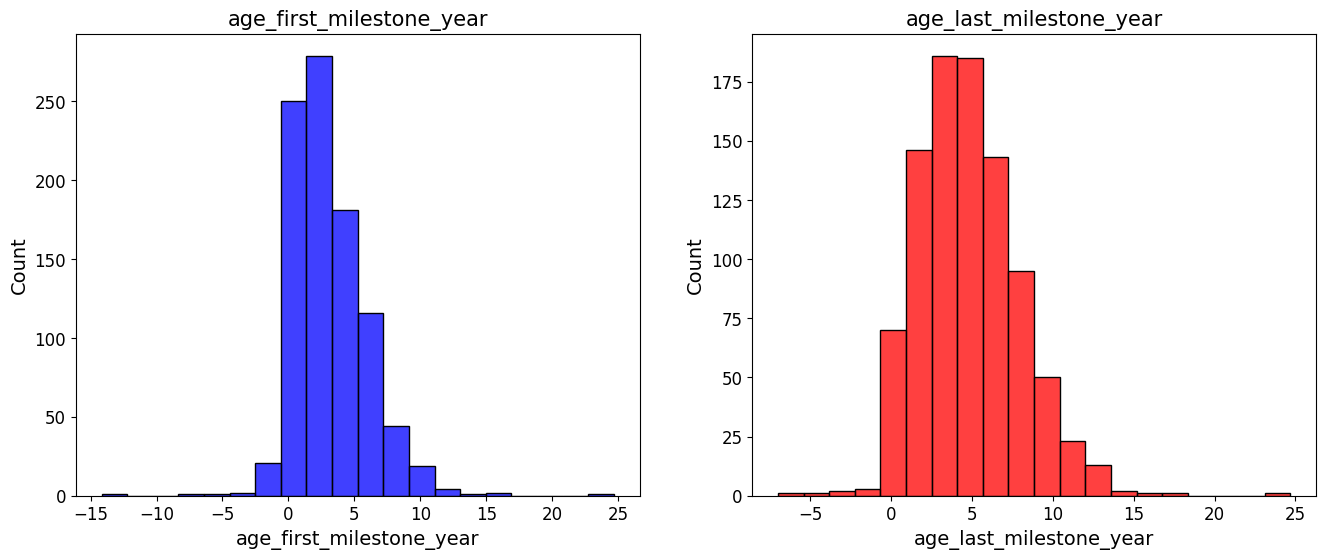

In [28]:
# looking at the columns with the missing values:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(df['age_first_milestone_year'], bins=20, color='blue',ax=axes[0])
axes[0].set_title('age_first_milestone_year', fontsize=15)
axes[0].set_xlabel('age_first_milestone_year', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
plt.grid()
print('age_first_milestone_year', ' skewness:', df['age_first_milestone_year'].skew(axis = 0, skipna = True) )
df['age_first_milestone_year'].describe(include='all')

sns.histplot(data=df['age_last_milestone_year'],bins=20, color='red',ax=axes[1])
axes[1].set_title('age_last_milestone_year', fontsize=15)
axes[1].set_xlabel('age_last_milestone_year', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
plt.grid()
print('age_last_milestone_year', ' skewness:', df['age_last_milestone_year'].skew(axis = 0, skipna = True) )


# Get descriptive statistics
desc_first = df['age_first_milestone_year'].describe(include='all')
desc_last = df['age_last_milestone_year'].describe(include='all')

# Combine the statistics into a single DataFrame
desc_table = pd.DataFrame({
    'age_first_milestone_year': desc_first,
    'age_last_milestone_year': desc_last
})

# Display the table with tabulate
print(tabulate(desc_table, headers='keys', tablefmt='pretty'))


In [29]:
# #deal with different date formats
# from datetime import datetime

# dates_in_df = ['last_funding_at','first_funding_at','founded_at']

# formatted_dates = []
# formatted_dates_MONTH_DAY = []
# formatted_dates_YEAR = []
# for ind in dates_in_df:
#     dates = df[ind]
#     for date in dates:
#         # Try to parse the date string as MM/DD/YYYY
#         try:
#             parsed_date = datetime.strptime(date, '%m/%d/%Y')
#         # If it fails, assume the date string is in M/D/YYYY format
#         except ValueError:
#             parsed_date = datetime.strptime(date, '%m/%d/%Y')
#         # Extract month and year from the parsed date
#         day = parsed_date.strftime('%d')
#         month = parsed_date.strftime('%m')
#         year = parsed_date.strftime('%Y')
#         # Combine month and year as a string in MM/YYYY format
#         formatted_date_MONTH_DAY = f"{month}/{day}"
#         formatted_dates_MONTH_DAY.append(formatted_date_MONTH_DAY)
#         # year format only
#         formatted_date_YEAR = f"{year}"
#         formatted_dates_YEAR.append(formatted_date_YEAR)
#         # Convert the parsed date back to a string in MM/DD/YYYY format
#         formatted_date = parsed_date.strftime('%m/%d/%Y')
#         formatted_dates.append(formatted_date)
               
     
#     df[ind] = formatted_dates
#     df[ind + 'MONTH/DAY'] = formatted_dates_MONTH_DAY
#     df[ind + 'YEAR'] = formatted_dates_YEAR
#     formatted_dates = []
#     formatted_dates_MONTH_DAY = []
#     formatted_dates_YEAR = []
# df

In [16]:
# category_counts = df['category_code'].value_counts()
# plt.figure(figsize=(10, 8))
# sns.barplot(x=category_counts.values, y=category_counts.index, palette='Set2')
# plt.title('Most Common Categories', fontsize=16)
# plt.xlabel('Count', fontsize=14)
# plt.ylabel('Category', fontsize=14)
# plt.xticks(rotation=0, fontsize=12)
# plt.yticks(fontsize=12)
# plt.show()

### Split to nominal and numerical attributes

In [36]:
numeric_col = df.describe().columns # to get the numeric column
numeric_data = df[numeric_col]
nominal_data = df.drop(numeric_col, axis=1)
numeric_data

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,UEM_at_year_1,UEM_at_year_2,UEM_at_year_3,UEM_at_year_4,UEM_at_year_5,UEM_at_year_6,UEM_at_year_7,UEM_at_year_8,UEM_at_year_9,UEM_at_year_10
0,42.358880,-71.056820,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,...,8.069,8.949,9.633,9.254,5.784,4.622,4.623,5.084,5.529,5.989
1,37.238916,-121.973718,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,...,8.069,8.949,9.633,9.254,5.784,4.622,4.623,5.084,5.529,5.989
2,32.901049,-117.192656,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,...,8.069,8.949,9.633,9.254,5.784,4.622,4.623,5.084,5.529,5.989
3,37.320309,-122.050040,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,...,8.069,8.949,9.633,9.254,5.784,4.622,4.623,5.084,5.529,5.989
4,37.779281,-122.419236,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,...,8.069,8.949,9.633,9.254,5.784,4.622,4.623,5.084,5.529,5.989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,37.740594,-122.376471,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,...,8.069,8.949,9.633,9.254,5.784,4.622,4.623,5.084,5.529,5.989
919,42.504817,-71.195611,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,...,8.069,8.949,9.633,9.254,5.784,4.622,4.623,5.084,5.529,5.989
920,37.408261,-122.015920,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,...,8.069,8.949,9.633,9.254,5.784,4.622,4.623,5.084,5.529,5.989
921,37.556732,-122.288378,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,...,8.069,8.949,9.633,9.254,5.784,4.622,4.623,5.084,5.529,5.989


We Created a folium map – a geographic interface – where we can see all the companies around the world, and we color coded it so that the successful companies are green colored, and the unsuccessful companies are red colored.

In [39]:
# Create a folium map centered on the first location in the dataframe
map = folium.Map(location=[numeric_data['latitude'][0], numeric_data['longitude'][0]], zoom_start=5)

for i in range(len(numeric_data)):
    popup_text = f"{df['status_code'][i]} "
    if df['status_code'][i] == 1:
        c = 'green'
    else:# Target = closed
        c = 'red'

    folium.Marker([numeric_data['latitude'][i], numeric_data['longitude'][i]],
        icon=folium.Icon(color=c,popup = popup_text), icon_size=(70, 70)).add_to(map)
    
# Display the map
map


We used cross-tabulation (crosstab) table to show that most of the companies are in CA and 2/3 of them were successful. So, it might be an indication that there's a strong connection between the companies location and their chance to succeed. We then show a similar connection using in_Top500 column.

In [40]:
# cross-tabulation (crosstab) table
ct = pd.crosstab(index=df['status_code'], columns=[df['is_NY'],df['is_MA'], df['is_CA'], df['is_TX'],df['is_otherstate']])
ct

is_NY          0                     1
is_MA          0                 1   0
is_CA          0             1   0   0
is_TX          0        1    0   0   0
is_otherstate  0    1   0    0   0   0
status_code                           
0              1  103  19  155  19  29
1              0  101  23  332  64  77

In [41]:
# cross-tabulation (crosstab) table
ct = pd.crosstab(index=df['status_code'], columns=[df['is_top500']])
ct

is_top500,0,1
status_code,,
0,116,210
1,60,537


We noticed, using boxplot, that in funding_total_usd column we have outliers. We found that there was one company that raised a lot of money, compared to the other companies. We decided to use log data transformation. 

<Axes: ylabel='funding_total_usd'>

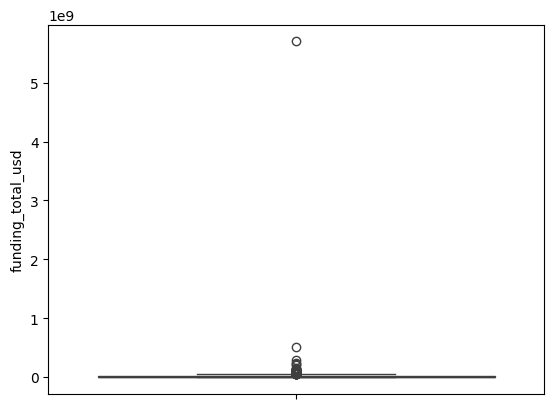

In [42]:
sns.boxplot(y="funding_total_usd", data=numeric_data)

In [43]:
# outliers:
data_mean = df['funding_total_usd'].mean()
data_std = df['funding_total_usd'].std()
cut_off = data_std * 3
lower_bound = data_mean - cut_off
upper_bound = data_mean + cut_off
df.loc[(df['funding_total_usd'] > upper_bound) | (df['funding_total_usd'] < lower_bound)]

,state_code,latitude,longitude,zip_code,city,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,...,UEM_at_year_1,UEM_at_year_2,UEM_at_year_3,UEM_at_year_4,UEM_at_year_5,UEM_at_year_6,UEM_at_year_7,UEM_at_year_8,UEM_at_year_9,UEM_at_year_10
364,WA,30.63248,-86.984345,98033,Kirkland,5/6/2008,2/27/2013,4.6,9.4164,5.2575,...,8.069,8.949,9.633,9.254,5.784,4.622,4.623,5.084,5.529,5.989


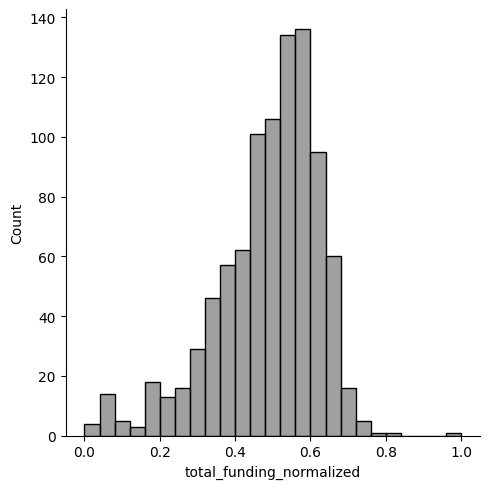

In [44]:
from sklearn.preprocessing import MinMaxScaler

df['funding_total_usd_log'] = np.log(df['funding_total_usd'])
scaler = MinMaxScaler()
df['total_funding_normalized'] = scaler.fit_transform(df[['funding_total_usd_log']])


# df[['funding_total_usd','total_funding_normalized']].head()
sns.displot(df['total_funding_normalized'], bins=25, color='gray')


<Axes: ylabel='total_funding_normalized'>

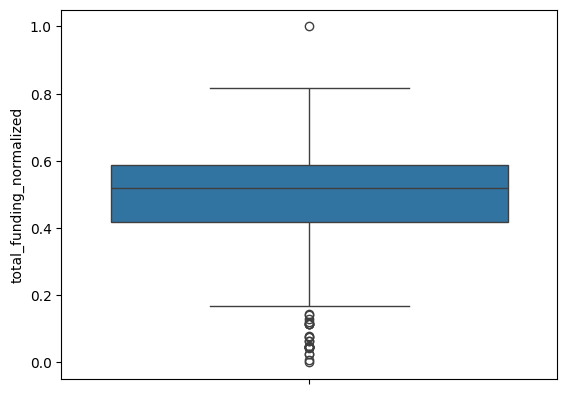

In [45]:
sns.boxplot(y="total_funding_normalized", data=df)

Preprocess:

In [52]:
df.info() # after preprocess

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   state_code                        923 non-null    object        
 1   latitude                          923 non-null    float64       
 2   longitude                         923 non-null    float64       
 3   zip_code                          923 non-null    object        
 4   city                              923 non-null    object        
 5   first_funding_at                  923 non-null    object        
 6   last_funding_at                   923 non-null    object        
 7   age_first_funding_year            923 non-null    float64       
 8   age_last_funding_year             923 non-null    float64       
 9   age_first_milestone_year          923 non-null    float64       
 10  age_last_milestone_year           923 non-null    

Visualization:

C:\Users\oralo\AppData\Local\Temp\ipykernel_112144\1619564235.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=funding_bin_counts.index, y=funding_bin_counts.values, palette='viridis')


Text(0, 0.5, 'Number of Startups')

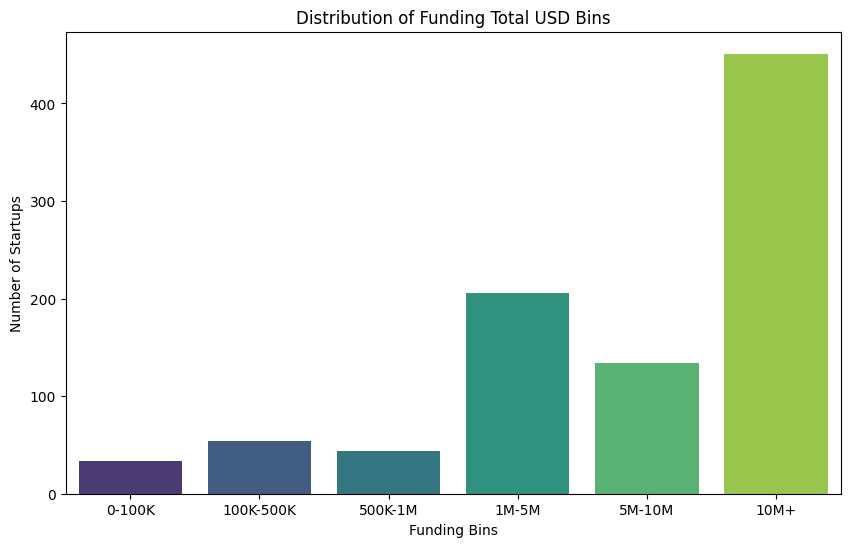

In [53]:
# plot funding bins using a bar plot
bin_edges = [0, 100000, 500000, 1000000, 5000000, 10000000, df['funding_total_usd'].max()] # binning funding_total_usd- i use this since histplot was unclear
bin_labels = ['0-100K', '100K-500K', '500K-1M', '1M-5M', '5M-10M', '10M+']
df['funding_bins'] = pd.cut(df['funding_total_usd'], bins=bin_edges, labels=bin_labels, include_lowest=True)

funding_bin_counts = df['funding_bins'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=funding_bin_counts.index, y=funding_bin_counts.values, palette='viridis')
plt.title('Distribution of Funding Total USD Bins')
plt.xlabel('Funding Bins')
plt.ylabel('Number of Startups')


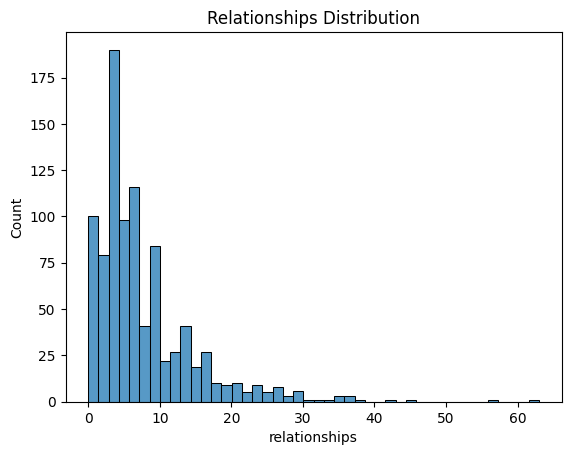

In [54]:
sns.histplot(df['relationships'])
plt.title('Relationships Distribution')
plt.show()

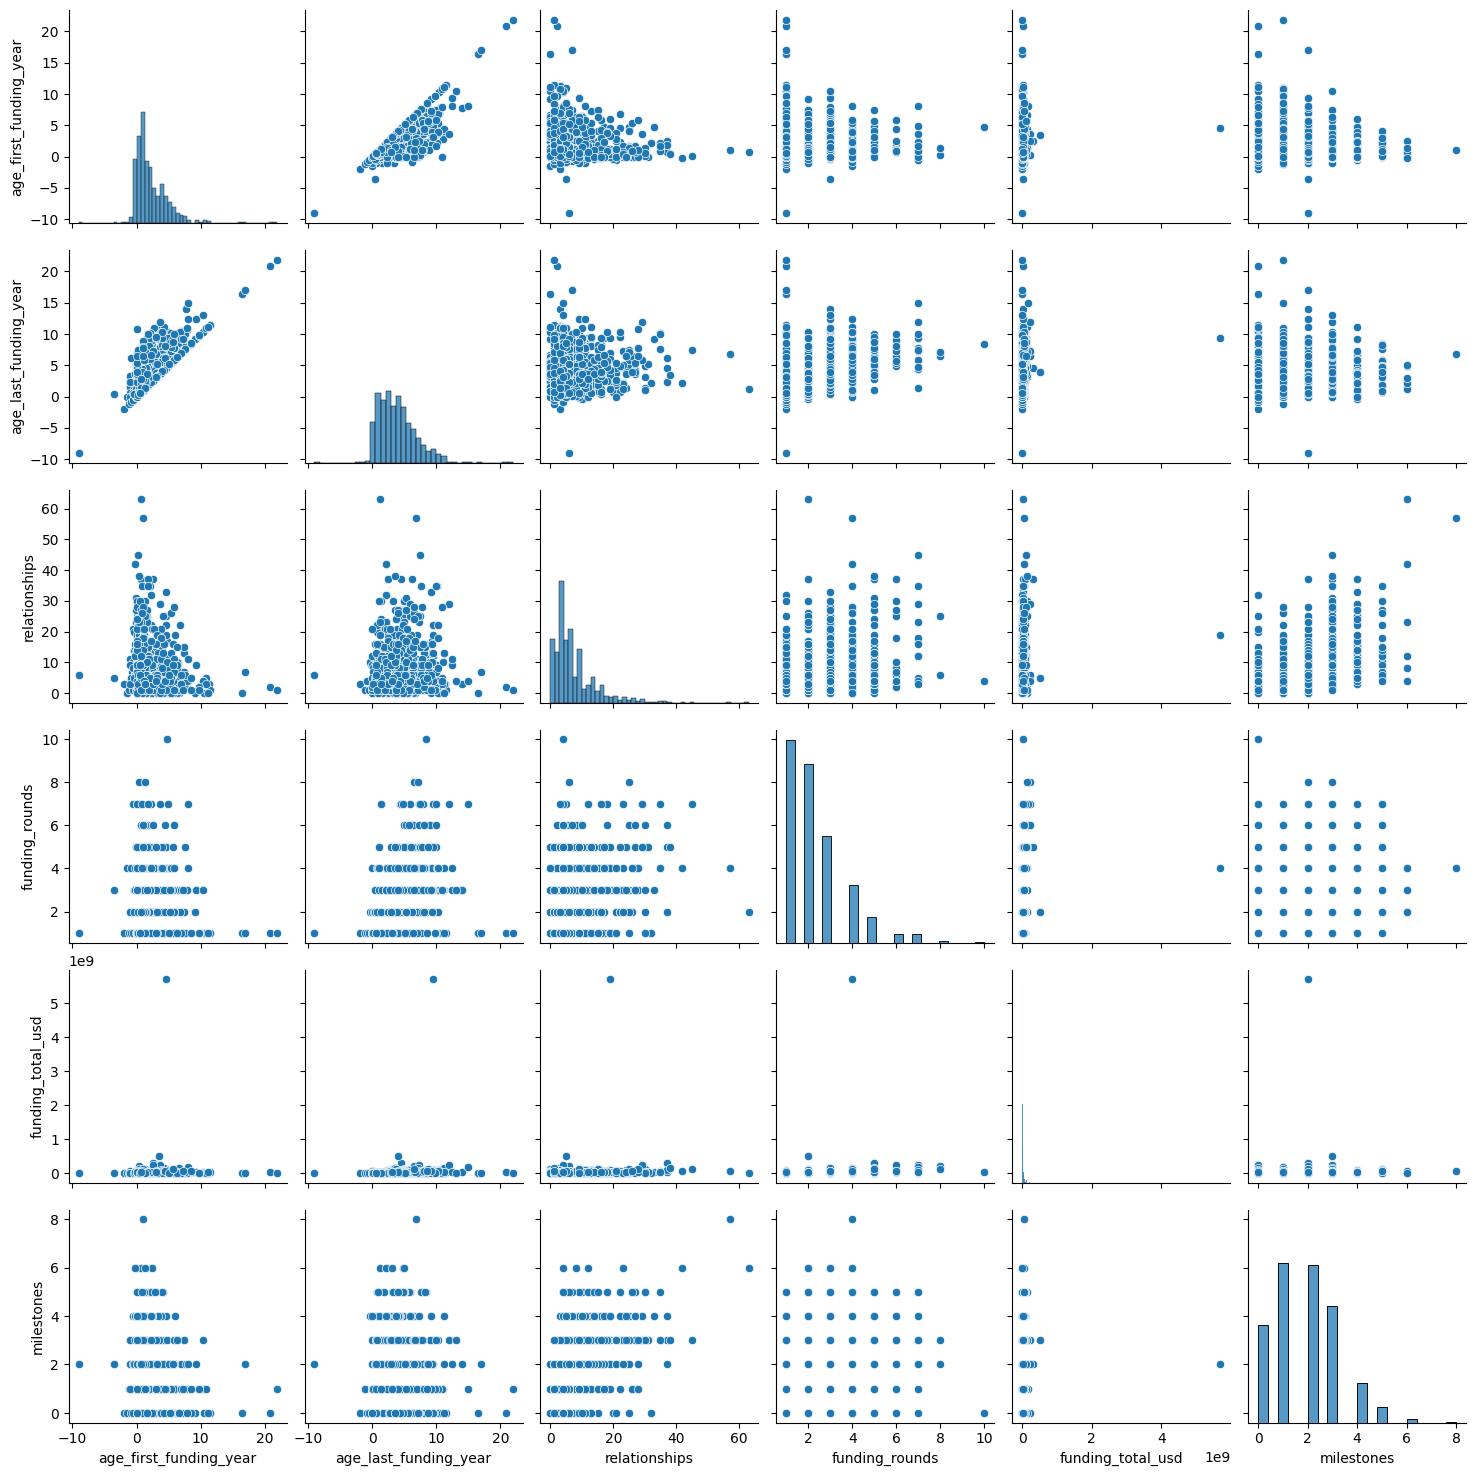

In [55]:
# Pair plot
sns.pairplot(df[['age_first_funding_year', 'age_last_funding_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones']])
plt.show()


C:\Users\oralo\AppData\Local\Temp\ipykernel_112144\313395676.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status_code', data=df, palette='viridis')


Text(0.5, 1.0, 'Distribution of Startup Status')

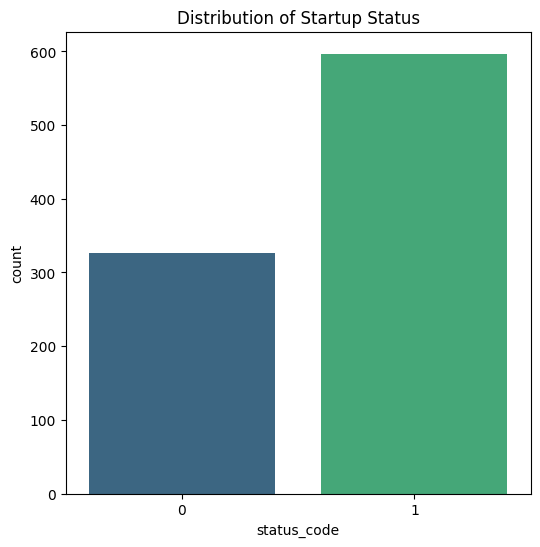

In [57]:
# Distribution of status
plt.figure(figsize=(6, 6))
sns.countplot(x='status_code', data=df, palette='viridis')
plt.title('Distribution of Startup Status')


C:\Users\oralo\AppData\Local\Temp\ipykernel_112144\3328774266.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status_code', y='funding_rounds', data=df, palette='viridis')


Text(0.5, 1.0, 'Funding Rounds Distribution by Status')

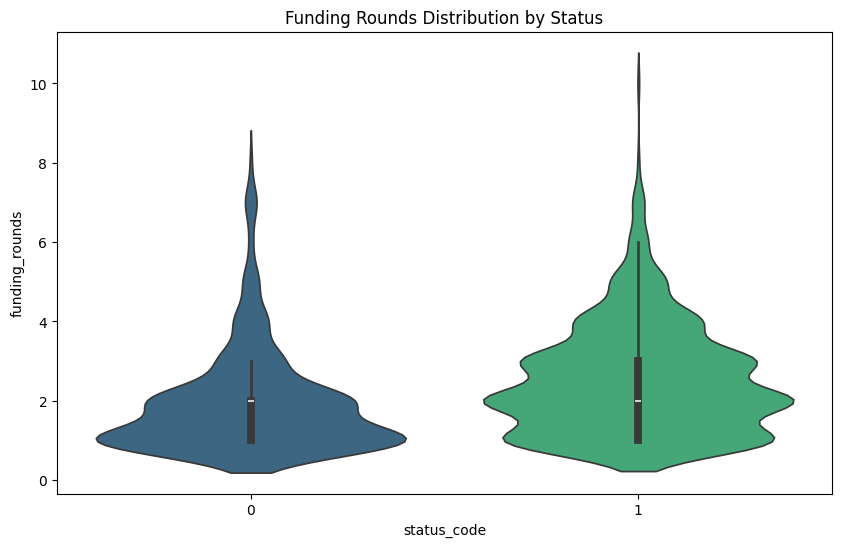

In [58]:
# Violin plot for funding rounds distribution by status
plt.figure(figsize=(10, 6))
sns.violinplot(x='status_code', y='funding_rounds', data=df, palette='viridis')
plt.title('Funding Rounds Distribution by Status')


In [59]:
df.to_csv('df.csv', index=False)
